In [80]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy. stats import norm
import scipy.stats as st

In [74]:
LYMPH_AREA = [88.57, 84.96, 58.20, 60.84, 66.21, 64.55, 90.62, 65.14, 97.27, 52.83, 97.85, 122.56, 61.72, 63.96, 96.00, 83.50, 79.59, 65.43, 172.66, 56.15, 71.97, 83.69, 138.38, 113.87, 67.29, 97.07, 68.07, 97.17, 68.26, 46.87, 125.59, 88.96, 58.89, 143.85, 69.24, 94.24, 117.97, 78.03, 56.25, 87.30, 81.74, 88.67, 60.35, 132.23, 54.20, 80.86, 74.32, 86.91, 65.43, 88.38]
LYMPH_NPOLAR = [0.04430, 0.06694, 0.02357, 0.02025, 0.28590, 0.06605, 0.06168, 0.12731, 0.14691, 0.04050, 0.11609, 0.09951, 0.12401, 0.13511, 0.14220, 0.13795, 0.12573, 0.12839, 0.11360, 0.16065, 0.05355, 0.10924, 0.26627, 0.27559, 0.06046, 0.11169, 0.10379, 0.15838, 0.05226, 0.28644, 0.21480, 0.01329, 0.09822, 0.26709, 0.08579, 0.26515, 0.21619, 0.06251, 0.08225, 0.19916, 0.18759, 0.07373, 0.03184, 0.03571, 0.12607, 0.11498, 0.19376, 0.11575, 0.13287, 0.14543]
m0_LYMPH_AREA = 83.2
m0_LYMPH_NPOLAR = 0.139
sigma_sqrt0_LYMPH_AREA = 908.1
sigma_sqrt0_LYMPH_NPOLAR = 0.007577
r0 = 0.263

SEGM_AREA = []
SEGM_NPOLAR = [0.35562, 0.41851, 0.07075, 0.05790, 0.16624, 0.16279, 0.23312, 0.33980, 0.22133, 0.19842, 0.45261, 0.24750, 0.43784, 0.62685, 0.40875, 0.07849, 0.46653, 0.57634, 0.28871, 0.45371, 0.27975, 0.28245, 0.49191, 0.36211, 0.16117, 0.34791, 0.29316, 0.39522, 0.12825, 0.37506, 0.09172, 0.51553, 0.14884, 0.34438, 0.49097, 0.29225, 0.18480, 0.37200, 0.45508, 0.17288, 0.30542, 0.42202, 0.14343, 0.02496, 0.27584, 0.30813, 0.23072, 0.20540, 0.07874, 0.37051]

In [16]:
LYMPH = pd.DataFrame({'AREA': LYMPH_AREA[:], 'NPOLAR': LYMPH_NPOLAR[:], 'ODG': LYMPH_ODG[:]})

In [17]:
LYMPH.head(5)

,AREA,NPOLAR,ODG
0,88.57,0.04430,0.2486
1,84.96,0.06694,0.2930
2,58.20,0.02357,0.4993
3,60.84,0.02025,0.3993
4,66.21,0.28590,0.4714


1.2.1. Работаем с исходной выборкой объёма n.
1.2.2. Среди всех выборочных значений найдите минимальное значение − x_min 
1.2.3. Среди всех выборочных значений найдите максимальное значение - x_max

In [18]:
x_max = LYMPH.NPOLAR.max(axis=0)
x_max

0.28644

In [19]:
x_min = LYMPH.NPOLAR.min(axis=0)
x_min

0.01329

1.2.4. Вычислите размах

In [20]:
R = x_max - x_min
R

0.27314999999999995

1.2.5. Определите число интервалов

In [21]:
s = 1 + (3.3 * math.log10(LYMPH.NPOLAR.size))
s

6.606601014308861

1.2.6. Определите длину интервала (шаг разбиения)   Значение
h округлите до числа десятичных знаков после запятой, содержащихся в выборочных значениях x_k изучаемого признака (см. 1.1.2) так, чтобы на конце была четная цифра.

In [22]:
h = round(R/s, 5) + 0.00001
h

0.04136

1.2.7. За начало первого интервала gamma0 рекомендуется выбирать gamma0 = x_min − h⁄2. Хотя может так оказаться, в зависимости от данных, что эта величина окажется отрицательной. Тогда в качестве её значения можно взять величину gamma0 = gamma0/2.

In [23]:
gamma0 = x_min/2
gamma0

0.006645

1.2.8. Нахождение границ интервалов.
1.2.8.1. От точки gamma0 с шагом h получаем границы интервалов gammak, пока не будут покрыты x_min и x_max.
1.2.8.2. Полученные значения gammak – границ интервалов внесите в таблицу No 1 (статистическая таблица).
1.2.8.3. Рассчитайте середины интервалов

In [24]:
gammak = [0.006645]
gamma_t = gamma0
while(gamma_t + h < x_max):
    gammak.append(round(gamma_t + h, 5))
    gamma_t += h
gammak.append(round(gamma_t + h, 5))
gammak

[0.006645, 0.048, 0.08936, 0.13073, 0.17209, 0.21345, 0.25481, 0.29617]

In [25]:
xk = [round(gamma0 + h/2, 5)]
for i in range(1, len(gammak)-1):
    xk.append(round(xk[i - 1] + h, 5))
xk

[0.02733, 0.06869, 0.11005, 0.15141, 0.19277, 0.23413, 0.27549]

| Nk | Границы интервалов, gamma_k-1 + e, gammak | Кодировка | Частота mk | Накопленная частота Mk | Середина интервала xk |
|---|---|---|---|---|---|
| 1 | [0.00664, 0.04799] |  | 7 | 7 | 0.02732 |
| 2 | [0.04800, 0.08934] |  | 10 | 17 | 0.06867 |
| 3 | [0.08935, 0.13070] |  | 14 | 31 | 0.11002 |
| 4 | [0.13071, 0.17205] |  | 8 | 39 | 0.15137 |
| 5 | [0.17206, 0.21340] |  | 3 | 42 | 0.19272 |
| 6 | [0.21341, 0.25474] |  | 2 | 44 | 0.23407 |
| 7 | [0.25475, 0.29609] |  | 6 | 50 | 0.27542 |


In [26]:
k = 0
for element in LYMPH.NPOLAR:
    if (element >= 0.25475) and (element <= 0.29609):
        k += 1
k

6

In [27]:
std = LYMPH.ODG.std()
std

0.10808324722459187

In [28]:
mean = LYMPH.ODG.mean()
mean

0.399406

Гистограмма

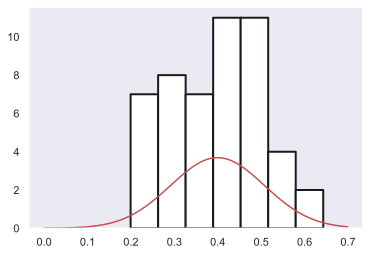

In [29]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
x = np.arange (0, 0.7, 0.001)

ax.hist(LYMPH.ODG, 7, color='w', linewidth=2, edgecolor='k')
plt.plot (x, norm.pdf(x, mean, std), color='r')
ax.grid()
plt.show()

Полигон

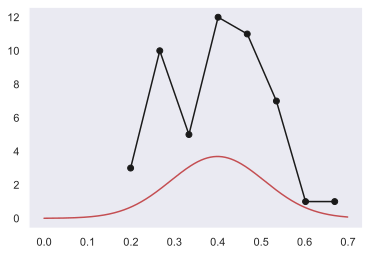

In [30]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
#x = np.arange (0, 0.3, 0.001)

m0 = [7, 10, 14, 8, 3, 2, 6]
mk = [3, 10, 5, 12, 11, 7, 1, 1]
xk = [0.19930, 0.26645, 0.33360, 0.40075, 0.46790, 0.53505, 0.60220, 0.66935]

plt.plot(xk, mk, 'o-', color='k')
plt.plot (x, norm.pdf(x, mean, std), color='r')
ax.grid()
plt.show()

Кумулята

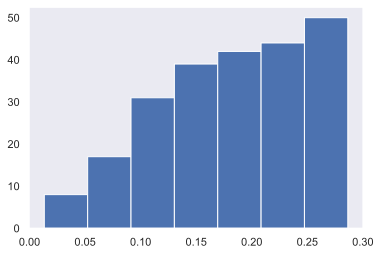

In [31]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
#x = np.arange (0, 0.3, 0.001)

mk = [7, 17, 31, 39, 42, 44, 50]

plt.hist(LYMPH.NPOLAR, bins=7, cumulative=True)
ax.grid()
plt.show()

1.3.1 Нахождение медианы (Me).

In [32]:
gamma_k_1 = 0.08935
M_k_1 = 17
m_k = 14
Me = gamma_k_1 + (h*((25-M_k_1)/m_k))
Me

0.1129842857142857

1.3.3. Нахождение моды (Mo).

In [33]:
gamma_k_1 = 0.08934
m = [7, 10, 14, 8, 3, 2, 6]
k = 2
Mo = gamma_k_1 + (h*((m[k] - m[k-1])/(2*m[k] - m[k-1] - m[k+1])))
Mo

0.105884

1.4. Метод произведений для вычисления характеристик вариационного ряда.

In [34]:
xk = [0.02732, 0.06867, 0.11002, 0.15137, 0.19272, 0.23407, 0.27542]
mk = [7, 10, 14, 8, 3, 2, 6]
sum(mk)

50

| xk | mk | yk | mkyk | mkyk^2 | mkyk^3 | mkyk^4|
|---|---|---|---|---|---|---|
| 0.02732 | 7 | -2 | -14 | 28 | -56 | 112 |
| 0.06867 | 10 | -1 | -17 | 10 | -10 | 10 |
| 0.11002 | 14 | 0 | 0 | 0 | 0 | 0 |
| 0.15137 | 8 | 1 | 39 | 8 | 8 | 8 |
| 0.19272 | 3 | 2 | 84 | 12 | 24 | 48 |
| 0.23407 | 2 | 3 | 132 | 18 | 54 | 162 |
| 0.27542 | 6 | 4 | 200 | 96 | 384 | 1536 |
|  | 50 | 7 | 20 | 172 | 404 | 1876 |

In [35]:
a = 0.11002
yk = []
for el in xk:
    yk.append(round((el - a)/h, 1))
sum(yk)

7.0

pow 1

In [36]:
mkyk = []
for i in range(0, 7):
    mkyk.append(mk[i] * yk[i])
sum1 = sum(mkyk)

pow 2

In [37]:
mkyk = []
for i in range(0, 7):
    mkyk.append(mk[i] * pow(yk[i], 2))
sum2 = sum(mkyk)

pow 3

In [38]:
mkyk = []
for i in range(0, 7):
    mkyk.append(mk[i] * pow(yk[i], 3))
sum3 = sum(mkyk)

pow 4

In [39]:
mkyk = []
for i in range(0, 7):
    mkyk.append(mk[i] * pow(yk[i], 4))
sum4 = sum(mkyk)

1.4.6. Рассчитайте начальные моменты для масштабированной переменной y:

In [40]:
a1y = (1/50)*sum1
a2y = (1/50)*sum2
a3y = (1/50)*sum3
a4y = (1/50)*sum4
a1y, a2y, a3y, a4y

(0.4, 3.44, 8.08, 37.52)

In [41]:
nu2y = sigma_sq = a2y - pow(a1y, 2)
nu2y

3.28

In [42]:
sigma = math.sqrt(sigma_sq)
round(sigma, 5)

1.81108

In [43]:
nu3y = a3y - 3*a2y*a1y + 2*pow(a1y, 3)
nu3y

4.08

In [44]:
nu4y = a4y - 4*a3y*a1y + 6*a2y*pow(a1y, 2) + 3*pow(a1y, 4)
round(nu4y, 2)

27.97

In [45]:
x_mean = h*a1y + a
x_mean

0.126564

In [46]:
As = nu3y/pow(sigma, 3)
As

0.6868302231484359

In [47]:
sigma_sq_x = pow(h, 2)*nu2y
sigma_sq_x

0.005610930688

In [48]:
Ex = (nu4y/pow(sigma, 4)) - 3
Ex

-0.40005948839976124

| numb | n | h | x_mean | std | As | Ex | Mo | Me | nu2y | nu3y | nu4y |
|---|---|---|---|---|---|---|---|---|---|---|---|
| 1 | 50 | 0.04135 | 0.12613 | 0.00561 | 0.68683 | -0.40006 | 0.10588 | 0.11298 | 3.28 | 4.08 | 27.97 |

| n | x_mean | s^2 | sigma_x_mean | sigma_s^2 |
|---|---|---|---|---|
| 50 | 0.12613 | 0.00572 | 0.010700 | 0.00113 |
| 10 | 0.08834 | 0.00652 | 0.025534 | 0.00276 |

In [49]:
n = 50
x_mean = 0.12613
S_sq = (n/(n-1))*sigma_sq_x
S_sq

0.00572543947755102

In [50]:
sigma_x_mean = math.sqrt(S_sq)/math.sqrt(n)
sigma_x_mean

0.010700877980381815

In [51]:
sigma_s_sq = (S_sq*math.sqrt(2*(n-1)))/n
sigma_s_sq

0.0011335791823578573

| k | xk | xk-x_mean_10 | (xk - x_mean_10)^2 |
|---|---|---|---|
| 0 | 0.04430 | -0.04404 | 0.00194 |
| 1 | 0.06694 | -0.0214 | 0.00046 |
| 2 | 0.02357 | -0.06477 | 0.0042 |
| 3 | 0.02025 | -0.06809 | 0.00464 |
| 4 | 0.28590 | 0.19756 | 0.03903 |
| 5 | 0.06605 | -0.02229 | 0.0005 |
| 6 | 0.06168 | -0.02666 | 0.00071 |
| 7 | 0.12731 | 0.03897 | 0.00152 |
| 8 | 0.14691 | 0.05857 | 0.00343 |
| 9 | 0.04050 | -0.04784 | 0.00229 |
|  | 0.08834 |  | 0.00652 |

In [52]:
LYMPH_NPOLAR_ten = [0.04430, 0.06694, 0.02357, 0.02025, 0.28590, 0.06605, 0.06168, 0.12731, 0.14691, 0.04050]

In [53]:
len(LYMPH_NPOLAR_ten)

10

In [54]:
x_mean_10 = sum(LYMPH_NPOLAR_ten)/10
x_mean_10

0.08834099999999999

In [55]:
x_summ = 0
for i in LYMPH_NPOLAR_ten:
    x_summ += round(math.pow(i - x_mean_10, 2), 5)
s_sq_ten = round(x_summ/9, 5)
s_sq_ten

0.00652

In [56]:
sigma_x_ten = math.sqrt(s_sq_ten)/math.sqrt(10)
sigma_x_ten

0.02553429066960741

In [57]:
sigma_s_sq_ten = (s_sq_ten*math.sqrt(2*(10-1)))/10
sigma_s_sq_ten

0.0027662017280017737

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky" rowspan="2">n</th>
    <th class="tg-0pky" rowspan="2">Parameter</th>
    <th class="tg-0pky" rowspan="2">Estimation</th>
    <th class="tg-0pky" colspan="3">a</th>
  </tr>
  <tr>
    <th class="tg-0pky">0,1</th>
    <th class="tg-0pky">0,05</th>
    <th class="tg-0pky">0,01</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky" rowspan="8">50</td>
    <td class="tg-0pky" rowspan="4">m</td>
    <td class="tg-0pky" rowspan="2">Asymptotic</td>
    <td class="tg-0pky">t_095 = 1.645</td>
    <td class="tg-0pky">t_0775 = 1.96</td>
    <td class="tg-0pky">t_0995 = 2.576</td>
  </tr>
  <tr>
    <td class="tg-0pky">(0.10853, 0.14373)</td>
    <td class="tg-0pky">(0.10516, 0.1471)</td>
    <td class="tg-0pky">(0.09857, 0.15369)</td>
  </tr>
  <tr>
    <td class="tg-0pky" rowspan="2">Accurate</td>
    <td class="tg-0pky">t_49_095 = 1.6766</td>
    <td class="tg-0pky">t_49_0775 = 2.0096</td>
    <td class="tg-0pky">t_49_0995 = 2.68</td>
  </tr>
  <tr>
    <td class="tg-0pky">(0.10819, 0.14407)</td>
    <td class="tg-0pky">(0.10463, 0.14763)</td>
    <td class="tg-0pky">(0.09745, 0.15481)</td>
  </tr>
  <tr>
    <td class="tg-0pky" rowspan="4">sigma_sq</td>
    <td class="tg-0pky" rowspan="2"><span style="font-weight:400;font-style:normal;text-decoration:none">Asymptotic</span></td>
    <td class="tg-0pky">t_095 = 1.645</td>
    <td class="tg-0pky">t_0775 = 1.96</td>
    <td class="tg-0pky">t_0995 = 2.576</td>
  </tr>
  <tr>
    <td class="tg-0pky">(0.00383, 0.00761)</td>
    <td class="tg-0pky">(0.00345, 0.00799)</td>
    <td class="tg-0pky">(0.00269, 0.00875)</td>
  </tr>
  <tr>
    <td class="tg-0pky" rowspan="2"><span style="font-weight:400;font-style:normal;text-decoration:none">Accurate</span></td>
    <td class="tg-0pky">chi_sq__49_005 = 66.34 chi_sq__49_095 = 33.93</td>
    <td class="tg-0pky">chi_sq__49_0025 = 19.02 chi_sq__49_0975 = 31.56</td>
    <td class="tg-0pky">chi_sq__49_0005 = 23.59 chi_sq__49_0995 = 27.25</td>
  </tr>
  <tr>
    <td class="tg-0pky">(0.00826, 0.00422)</td>
    <td class="tg-0pky">(0.00888, 0.00399)</td>
    <td class="tg-0pky">(0.01029, 0.00358)</td>
  </tr>
</tbody>
</table>

In [58]:
t_095 = 1.645
t_0775 = 1.96
t_0995 = 2.576

x_mean_fifty = 0.12613
sigma_x_fifty = 0.010700

m1_095 = round(x_mean_fifty - t_095*sigma_x_fifty, 5)
m2_095 = round(x_mean_fifty + t_095*sigma_x_fifty, 5)
print(m1_095, m2_095)

m1_0775 = round(x_mean_fifty - t_0775*sigma_x_fifty, 5)
m2_0775 = round(x_mean_fifty + t_0775*sigma_x_fifty, 5)
print(m1_0775, m2_0775)

m1_0995 = round(x_mean_fifty - t_0995*sigma_x_fifty, 5)
m2_0995 = round(x_mean_fifty + t_0995*sigma_x_fifty, 5)
print(m1_0995, m2_0995)

0.10853 0.14373
0.10516 0.1471
0.09857 0.15369


In [59]:
t_49_095 = 1.6766
t_49_0775 = 2.0096
t_49_0995 = 2.68

m1_095 = round(x_mean_fifty - t_49_095*sigma_x_fifty, 5)
m2_095 = round(x_mean_fifty + t_49_095*sigma_x_fifty, 5)
print(m1_095, m2_095)

m1_0775 = round(x_mean_fifty - t_49_0775*sigma_x_fifty, 5)
m2_0775 = round(x_mean_fifty + t_49_0775*sigma_x_fifty, 5)
print(m1_0775, m2_0775)

m1_0995 = round(x_mean_fifty - t_49_0995*sigma_x_fifty, 5)
m2_0995 = round(x_mean_fifty + t_49_0995*sigma_x_fifty, 5)
print(m1_0995, m2_0995)

0.10819 0.14407
0.10463 0.14763
0.09745 0.15481


In [60]:
t_095 = 1.645
t_0775 = 1.96
t_0995 = 2.576

s_sq_fifty = 0.00572
sigma_s_sq_fifty = 0.00113

m1_095 = round(s_sq_fifty - t_095*sigma_s_sq_fifty, 5)
m2_095 = round(s_sq_fifty + t_095*sigma_s_sq_fifty, 5)
print(m1_095, m2_095)

m1_0775 = round(s_sq_fifty - t_0775*sigma_s_sq_fifty, 5)
m2_0775 = round(s_sq_fifty + t_0775*sigma_s_sq_fifty, 5)
print(m1_0775, m2_0775)

m1_0995 = round(s_sq_fifty - t_0995*sigma_s_sq_fifty, 5)
m2_0995 = round(s_sq_fifty + t_0995*sigma_s_sq_fifty, 5)
print(m1_0995, m2_0995)

0.00386 0.00758
0.00351 0.00793
0.00281 0.00863


In [61]:
chi_sq__49_005 = 66.34
chi_sq__49_095 = 33.93
chi_sq__49_0025 = 70.22
chi_sq__49_0975 = 31.56
chi_sq__49_0005 = 78.23
chi_sq__49_0995 = 27.25

sigma1_sq_095 = round((49*s_sq_fifty)/(chi_sq__49_095), 5)
sigma2_sq_095 = round((49*s_sq_fifty)/(chi_sq__49_005), 5)
print(sigma1_sq_095, sigma2_sq_095)

sigma1_sq_0775 = round((49*s_sq_fifty)/(chi_sq__49_0975), 5)
sigma2_sq_0775 = round((49*s_sq_fifty)/(chi_sq__49_0025), 5)
print(sigma1_sq_0775, sigma2_sq_0775)

sigma1_sq_0995 = round((49*s_sq_fifty)/(chi_sq__49_0995), 5)
sigma2_sq_0995 = round((49*s_sq_fifty)/(chi_sq__49_0005), 5)
print(sigma1_sq_0995, sigma2_sq_0995)

0.00826 0.00422
0.00888 0.00399
0.01029 0.00358


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky" rowspan="2">n</th>
    <th class="tg-0pky" rowspan="2">Parameter</th>
    <th class="tg-0pky" rowspan="2">Estimation</th>
    <th class="tg-0pky" colspan="3">a</th>
  </tr>
  <tr>
    <th class="tg-0pky">0,1</th>
    <th class="tg-0pky">0,05</th>
    <th class="tg-0pky">0,01</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky" rowspan="8">10</td>
    <td class="tg-0pky" rowspan="4">m</td>
    <td class="tg-0pky" rowspan="2">Asymptotic</td>
    <td class="tg-0pky">t_095 = 1.645</td>
    <td class="tg-0pky">t_0775 = 1.96</td>
    <td class="tg-0pky">t_0995 = 2.576</td>
  </tr>
  <tr>
    <td class="tg-0pky">(0.04634, 0.13034)</td>
    <td class="tg-0pky">(0.03829 0.13839)</td>
    <td class="tg-0pky">(0.02256 0.15412)</td>
  </tr>
  <tr>
    <td class="tg-0pky" rowspan="2">Accurate</td>
    <td class="tg-0pky">t_9_095 = 1.6766</td>
    <td class="tg-0pky">t_9_0775 = 2.0096</td>
    <td class="tg-0pky">t_9_0995 = 2.68</td>
  </tr>
  <tr>
    <td class="tg-0pky">(0.04153, 0.13515)</td>
    <td class="tg-0pky">(0.03058, 0.1461)</td>
    <td class="tg-0pky">(0.00536, 0.17132)</td>
  </tr>
  <tr>
    <td class="tg-0pky" rowspan="4">sigma_sq</td>
    <td class="tg-0pky" rowspan="2"><span style="font-weight:400;font-style:normal;text-decoration:none">Asymptotic</span></td>
    <td class="tg-0pky">t_095 = 1.645</td>
    <td class="tg-0pky">t_0775 = 1.96</td>
    <td class="tg-0pky">t_0995 = 2.576</td>
  </tr>
  <tr>
    <td class="tg-0pky">(0.00198, 0.01106)</td>
    <td class="tg-0pky">(0.00111, 0.01193)</td>
    <td class="tg-0pky">(-0.00059, 0.01363)</td>
  </tr>
  <tr>
    <td class="tg-0pky" rowspan="2"><span style="font-weight:400;font-style:normal;text-decoration:none">Accurate</span></td>
    <td class="tg-0pky">chi_sq__9_005 = 66.34 chi_sq__49_095 = 33.93</td>
    <td class="tg-0pky">chi_sq__9_0025 = 19.02 chi_sq__49_0975 = 31.56</td>
    <td class="tg-0pky">chi_sq__9_0005 = 23.59 chi_sq__49_0995 = 27.25</td>
  </tr>
  <tr>
    <td class="tg-0pky">(0.01767, 0.00347)</td>
    <td class="tg-0pky">(0.02173, 0.00309)</td>
    <td class="tg-0pky">(0.0381, 0.00249)</td>
  </tr>
</tbody>
</table>

In [62]:
t_095 = 1.645
t_0775 = 1.96
t_0995 = 2.576

x_mean_ten = 0.08834
sigma_x_ten = 0.025534

m1_095 = round(x_mean_ten - t_095*sigma_x_ten, 5)
m2_095 = round(x_mean_ten + t_095*sigma_x_ten, 5)
print(m1_095, m2_095)

m1_0775 = round(x_mean_ten - t_0775*sigma_x_ten, 5)
m2_0775 = round(x_mean_ten + t_0775*sigma_x_ten, 5)
print(m1_0775, m2_0775)

m1_0995 = round(x_mean_ten - t_0995*sigma_x_ten, 5)
m2_0995 = round(x_mean_ten + t_0995*sigma_x_ten, 5)
print(m1_0995, m2_0995)

0.04634 0.13034
0.03829 0.13839
0.02256 0.15412


In [63]:
t_9_095 = 1.8331
t_9_0775 = 2.2622
t_9_0995 = 3.2498

m1_095 = round(x_mean_ten - t_9_095*sigma_x_ten, 5)
m2_095 = round(x_mean_ten + t_9_095*sigma_x_ten, 5)
print(m1_095, m2_095)

m1_0775 = round(x_mean_ten - t_9_0775*sigma_x_ten, 5)
m2_0775 = round(x_mean_ten + t_9_0775*sigma_x_ten, 5)
print(m1_0775, m2_0775)

m1_0995 = round(x_mean_ten - t_9_0995*sigma_x_ten, 5)
m2_0995 = round(x_mean_ten + t_9_0995*sigma_x_ten, 5)
print(m1_0995, m2_0995)

0.04153 0.13515
0.03058 0.1461
0.00536 0.17132


In [64]:
t_095 = 1.645
t_0775 = 1.96
t_0995 = 2.576

s_sq_ten = 0.00652
sigma_s_sq_ten = 0.00276

m1_095 = round(s_sq_ten - t_095*sigma_s_sq_ten, 5)
m2_095 = round(s_sq_ten + t_095*sigma_s_sq_ten, 5)
print(m1_095, m2_095)

m1_0775 = round(s_sq_ten - t_0775*sigma_s_sq_ten, 5)
m2_0775 = round(s_sq_ten + t_0775*sigma_s_sq_ten, 5)
print(m1_0775, m2_0775)

m1_0995 = round(s_sq_ten - t_0995*sigma_s_sq_ten, 5)
m2_0995 = round(s_sq_ten + t_0995*sigma_s_sq_ten, 5)
print(m1_0995, m2_0995)

0.00198 0.01106
0.00111 0.01193
-0.00059 0.01363


In [65]:
chi_sq__9_005 = 16.92
chi_sq__9_095 = 3.32
chi_sq__9_0025 = 19.02
chi_sq__9_0975 = 2.70
chi_sq__9_0005 = 23.59
chi_sq__9_0995 = 1.54

sigma1_sq_095 = round((9*s_sq_ten)/(chi_sq__9_095), 5)
sigma2_sq_095 = round((9*s_sq_ten)/(chi_sq__9_005), 5)
print(sigma1_sq_095, sigma2_sq_095)

sigma1_sq_0775 = round((9*s_sq_ten)/(chi_sq__9_0975), 5)
sigma2_sq_0775 = round((9*s_sq_ten)/(chi_sq__9_0025), 5)
print(sigma1_sq_0775, sigma2_sq_0775)

sigma1_sq_0995 = round((9*s_sq_ten)/(chi_sq__9_0995), 5)
sigma2_sq_0995 = round((9*s_sq_ten)/(chi_sq__9_0005), 5)
print(sigma1_sq_0995, sigma2_sq_0995)

0.01767 0.00347
0.02173 0.00309
0.0381 0.00249


Задание 3

| Nk | gammak | Частота mk | tk = (gammak - x_mean)/std | Фk = FN(tk) | pk | npk | (mk - npk)^2/npk |
|---|---|---|---|---|---|---|---|
| 0 | 0.04799 | 7 | -1.04 | 0.14917 | 0.14917 | 7.4585 | 0.02819 |
| 1 | 0.08934 | 10 | -0.49 | 0.31207 | 0.1629 | 8.145 | 0.42247 |
| 2 | 0.13070 | 14 | 0.06 | 0.52392 | 0.21185 | 10.5925 | 1.09616 |
| 3 | 0.17205 | 8 | 0.61 | 0.72907 | 0.20515 | 10.2575 | 0.49684 |
| 4 | 0.21340 | 3 | 1.17 | 0.879 | 0.14993 | 7.4965 | 2.69706 |
| 5 | 0.25474 | 2 | 1.72 | 0.95728 | 0.07828 | 3.914 | 0.93597 |
| 6 | infinity | 6 | inf | 1 | 0.04272 | 2.136 | 6.98993 |
|  |  |  |  |  |  |  | 12.66662 |

In [66]:
std = 0.00561
x_mean = 0.12613
gammak = [0.04799, 0.08934, 0.13070, 0.17205, 0.21340, 0.25474]
for k in gammak:
    print(round((k - x_mean)/math.sqrt(std), 2))

-1.04
-0.49
0.06
0.61
1.17
1.72


In [67]:
Фk = [round(1 - 0.85083,5), round(1 - 0.68793,5), 0.52392, 0.72907, 0.87900, 0.95728, 1]
Фk

[0.14917, 0.31207, 0.52392, 0.72907, 0.879, 0.95728, 1]

In [68]:
for i in range(1, len(Фk)):
    print(round(Фk[i] - Фk[i-1], 5))

0.1629
0.21185
0.20515
0.14993
0.07828
0.04272


In [3]:
pk = [0.14917, 0.1629, 0.21185, 0.20515, 0.14993, 0.07828, 0.04272]
for i in pk:
    print(round(i*50, 5))

7.4585
8.145
10.5925
10.2575
7.4965
3.914
2.136


In [9]:
mk = [7, 10, 14, 8, 3, 2, 6]
nkp = [7.4585, 8.145, 10.5925, 10.2575, 7.4965, 3.914, 2.136]
for i in range(0, len(nkp)):
    print(round(((mk[i] - nkp[i])**2)/nkp[i], 5))

0.02819
0.42247
1.09616
0.49684
2.69706
0.93597
6.98993


In [10]:
chi = [0.02819, 0.42247, 1.09616, 0.49684, 2.69706, 0.93597, 6.98993]
sum(chi)

12.66662

In [72]:
v = 7 - 2 - 1

|  | 0.1 | 0.05 | 0.01 |
|---|---|---|---|
| chi_sq_1-a | 1,06 | 0,21 | 0,09 |
| chi_sq | 150.75008 | 150.75008 | 150.75008 |
| H: | да | да | да |

| gamma_k | tk = (gammak - x_mean)/std | nФk = nFN(tk) |  | delta_k = \nФk - Mk\ |
|---|---|---|---|---|
| 0.04799 | -1.04 | 7.4585 | 7 | 0.4585 |
| 0.08934 | -0.49 | 15.6035 | 17 | 1.3965 |
| 0.13070 | 0.06 | 26.196 | 31 | 4.804 |
| 0.17205 | 0.61 | 36.4535 | 39 | 2.5465 |
| 0.21340 | 1.17 | 43.95 | 42 | 1.95 |
| 0.25474 | 1.72 | 47.864 | 44 | 3.864 |
| 0.29609 | 2.27 | 49.42 | 50 | 0.58 |

In [73]:
std = 0.00561
x_mean = 0.12613
gammak = [0.04799, 0.08934, 0.13070, 0.17205, 0.21340, 0.25474, 0.29609]
for k in gammak:
    print(round((k - x_mean)/math.sqrt(std), 2))

-1.04
-0.49
0.06
0.61
1.17
1.72
2.27


In [74]:
n = 50
Фk = [n*round(1 - 0.85083,5), n*round(1 - 0.68793,5), n*0.52392, n*0.72907, n*0.87900, round(n*0.95728, 5), round(n*0.98840, 5)]
Фk

[7.4585, 15.6035, 26.196, 36.4535, 43.95, 47.864, 49.42]

In [75]:
mk = [7, 17, 31, 39, 42, 44, 50]
for i in range(0, len(mk)):
    print(round(abs(Фk[i] - mk[i]), 5))

0.4585
1.3965
4.804
2.5465
1.95
3.864
0.58


In [76]:
lambdaa = 4.804/math.sqrt(50)
lambdaa

0.6793881953640348

|  | 0.1 | 0.05 | 0.01 |
|---|---|---|---|
| lambda_1-a | 0.11384 | 0.12530 | 0.14580 |
| lambda | 0.67939 | 0.67939 | 0.67939 |
| H:| да | да | да |

In [77]:
1.031/math.sqrt(50)

0.1458054182806661

|  | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|---|---|---|---|---|---|---|---|---|---|---|
| X:xk | 0.0443 | 0.06694 | 0.02357 | 0.02025 | 0.2859 | 0.06605 | 0.06168 | 0.12731 | 0.14691 | 0.0405 |
| Y:zk | 0.35562 | 0.41851 | 0.07075 | 0.0579 | 0.16624 | 0.16279 | 0.23312 | 0.3398 | 0.22133 | 0.19842 |
| xk-zk | -0.31132 | -0.35157 | -0.04718 | -0.03765 | 0.11966 | -0.09674 | -0.17144 | -0.21249 | -0.07442 | -0.15792 |
| R(xk-zk) | 8 | 9 | 2 | 1 | 5 | 4 | 6 | 7 | 3 |

In [78]:
xz = [0.31132, 0.35157, 0.04718, 0.03765, 0.11966, 0.09674, 0.17144, 0.21249, 0.07442]
sorted(xz)

[0.03765,
 0.04718,
 0.07442,
 0.09674,
 0.11966,
 0.17144,
 0.21249,
 0.31132,
 0.35157]

In [79]:
X = LYMPH_NPOLAR[0:10]
Y = SEGM_NPOLAR[0:10]
for i in range(0, 10):
    print(round(X[i] - Y[i],5))

-0.31132
-0.35157
-0.04718
-0.03765
0.11966
-0.09674
-0.17144
-0.21249
-0.07442
-0.15792


In [80]:
n = min(1,9)

|  | 0.05 | 0.01 |
|---|---|---|
| na | 1 | 0 |
| n | 1 | 1 |
| H: | нет | да |

In [81]:
T = min(5, 1+2+3+4+6+7+8+9)

In [ ]:
for 

|  | 0.05 | 0.01 |
|---|---|---|
| Ta | 10 | 5 |
| T | 5 | 5 |
| H: | да | да |

|  | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| X:xk | 0.02025 | 0.02357 | 0.0405 | 0.0443 |  | 0.06168 | 0.06605 | 0.06694 |  | 0.12731 | 0.14691 |  |  |  |  |  | 0.2859 |
| Y:zk |  |  |  |  | 0.0579 |  |  |  | 0.07075 |  |  | 0.16279 | 0.16624 | 0.19842 | 0.22133 | 0.23312 |  | 0.3398 | 0.35562 | 0.41851 |
|  | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 |

In [78]:
X = LYMPH_NPOLAR[0:10]
Y = SEGM_NPOLAR[0:10]

#X = [0.2486, 0.293, 0.4993, 0.3993, 0.4714, 0.3033, 0.4327, 0.4987, 0.5244, 0.3594]
#Y = [0.347, 0.4221, 0.3374, 0.3841, 0.376, 0.3303, 0.3115, 0.2959, 0.3177, 0.3653]

Ux = 0
for i in X:
    for j in Y:
        if i > j:
            Ux+=1
print(Ux)
Uy = 0
for i in Y:
    for j in X:
        if i > j:
            Uy+=1
print(Uy)
sorted(X)

14
86


[0.02025,
 0.02357,
 0.0405,
 0.0443,
 0.06168,
 0.06605,
 0.06694,
 0.12731,
 0.14691,
 0.2859]

In [83]:
sorted(Y)

[0.0579,
 0.07075,
 0.16279,
 0.16624,
 0.19842,
 0.22133,
 0.23312,
 0.3398,
 0.35562,
 0.41851]

In [84]:
min(1+2+3+4+6+7+8+10+11+17, 5+9+12+13+14+15+16+18+19+20)

69

|  | 0.05 | 0.01 |
|---|---|---|
| Ta | 78 | 71 |
| T | 69 | 69 |
| H: | да | да |

In [85]:
Ux = 4+3+2+1
Uz = 1+1+5+3

In [86]:
min(Ux, Uz)

10

|  | 0.05 | 0.01 |
|---|---|---|
| Ua | 27 | 19 |
| U | 14 | 14 |
| H: | H0 | H0 |

|  | 0.1 | 0.05 | 0.01 |
|---|---|---|---|
| tv,1-a | 1.2987 | 1.6759 | 2.4033 |
| tv | -0.17017 | -0.17017 | -0.17017 |
| H:| нет | нет | нет |

In [87]:
x_mean = 0.12613
sigma = math.sqrt(0.00572)
m0 = 0.139

In [88]:
tv = (x_mean - m0)/sigma
tv

-0.1701690336107016

|  | 0.1 | 0.05 | 0.01 |
|---|---|---|---|
| tv,1-a | 1.6759 | 2.0086 | 2.6778 |
| tv | 0.17017 | 0.17017 | 0.17017 |
| H:| нет | нет | нет |

In [89]:
sigma = 0.00572
S = 0.00572
ch_sq = ((50-1)*S)/sigma
ch_sq

49.0

|  | 0.1 | 0.05 | 0.01 |
|---|---|---|---|
| chi_sq,1-a | 27,99 67,51 | 29,71 71,42 | 34,76 79,49 |
| chi | 49.0 | 49.0 | 49.0 |
| H:| да | да | да |

In [90]:
Sx = 0.00572
Sz = 0.020979

F = Sz/Sx
F

3.6676573426573427

|  | 0.1 | 0.05 | 0.01 |
|---|---|---|---|
| F,1-a | 1,39 | 1,48 | 1,60 |
| F | 3.667 | 3.667 | 3.667 |
| H:| да | да | да |

In [91]:
v = 100-2

In [92]:
tv = (0.12656-0.296248)/(0.005608+0.000420)
tv

-28.149966821499667

|  | 0.1 | 0.05 | 0.01 |
|---|---|---|---|
| tv1-a | 1,6602 | 1,9840 | 2,6259 |
| tv | 28.14996 | 28.14996 | 28.14996 |
| H:| да | да | да |

In [93]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import math
#sns.set()
#rcParams['figure.figsize'] = 10, 6
#%config InlineBackend.figure_format = 'svg'

Задание 4

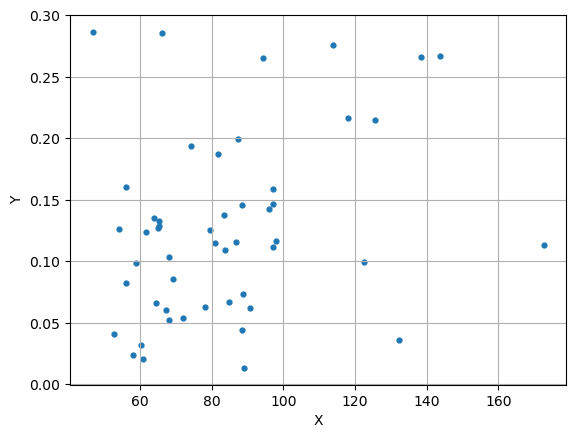

In [101]:
LYMPH_AREA = [88.57, 84.96, 58.20, 60.84, 66.21, 64.55, 90.62, 65.14, 97.27, 52.83, 97.85, 122.56, 61.72, 63.96, 96.00, 83.50, 79.59, 65.43, 172.66, 56.15, 71.97, 83.69, 138.38, 113.87, 67.29, 97.07, 68.07, 97.17, 68.26, 46.87, 125.59, 88.96, 58.89, 143.85, 69.24, 94.24, 117.97, 78.03, 56.25, 87.30, 81.74, 88.67, 60.35, 132.23, 54.20, 80.86, 74.32, 86.91, 65.43, 88.38]
LYMPH_NPOLAR = [0.04430, 0.06694, 0.02357, 0.02025, 0.28590, 0.06605, 0.06168, 0.12731, 0.14691, 0.04050, 0.11609, 0.09951, 0.12401, 0.13511, 0.14220, 0.13795, 0.12573, 0.12839, 0.11360, 0.16065, 0.05355, 0.10924, 0.26627, 0.27559, 0.06046, 0.11169, 0.10379, 0.15838, 0.05226, 0.28644, 0.21480, 0.01329, 0.09822, 0.26709, 0.08579, 0.26515, 0.21619, 0.06251, 0.08225, 0.19916, 0.18759, 0.07373, 0.03184, 0.03571, 0.12607, 0.11498, 0.19376, 0.11575, 0.13287, 0.14543]
r0 = 0.263

def ex_3_6():
    '''Визуализация корреляции между x и y'''
    xs = LYMPH_AREA
    ys = LYMPH_NPOLAR
    pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

ex_3_6()

Заполним таблицу:

In [39]:
xiyi = []
for i in range(0, len(LYMPH_AREA)):
    xiyi.append(LYMPH_AREA[i]*LYMPH_NPOLAR[i])
xi_sq = []
for i in range(0, len(LYMPH_AREA)):
    xi_sq.append(LYMPH_AREA[i]**2)
yi_sq = []
for i in range(0, len(LYMPH_AREA)):
    yi_sq.append(LYMPH_NPOLAR[i]**2)
data  = pd.DataFrame({'xi': LYMPH_AREA[:], 'yi': LYMPH_NPOLAR[:], 'xiyi' : xiyi, 'xi**2' : xi_sq, 'yi**2' : yi_sq})
data.head()

,xi,yi,xiyi,xi**2,yi**2
0,88.57,0.04430,3.923651,7844.6449,0.001962
1,84.96,0.06694,5.687222,7218.2016,0.004481
2,58.20,0.02357,1.371774,3387.2400,0.000556
3,60.84,0.02025,1.232010,3701.5056,0.000410
4,66.21,0.28590,18.929439,4383.7641,0.081739


In [38]:
data1  = {'xi_sum': sum(LYMPH_AREA[:]), 
                       'yi_sum': sum(LYMPH_NPOLAR[:]), 
                       'xiyi_sum' : sum(xiyi), 
                       'xi**2_sum' : sum(xi_sq), 
                       'yi**2_sum' : sum(yi_sq)}
data1

{'xi_sum': 4214.66,
 'yi_sum': 6.306500000000001,
 'xiyi_sum': 559.7029297999999,
 'xi**2_sum': 389484.6124,
 'yi**2_sum': 1.0662446884}

Решим систему уравнений где: <br>
a*sum(xi**2) + b*sum(xi) = sum(xiyi) <br>
a*sum(xi) + b*n = sum(yi)

In [50]:
M1 = np.array([[sum(xi_sq), sum(LYMPH_AREA[:])], [sum(LYMPH_AREA[:]), 50]])
v1 = np.array([sum(xiyi), sum(LYMPH_NPOLAR[:])])
arr = np.linalg.solve(M1, v1)
a = arr[0]
b = arr[1]
print(a,b)

0.0008214486196630748 0.056887467213016525


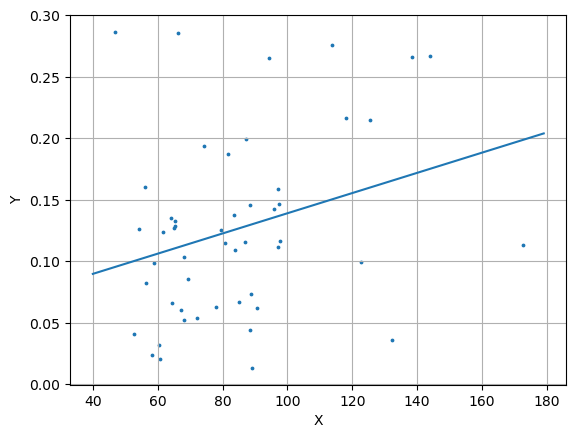

In [61]:
regression_line = lambda a, b: lambda x: (a*x) + b  # вызовы fn(a,b)(x)

def ex_3_6():
    '''Визуализация корреляции между x и y'''
    xs = LYMPH_AREA
    ys = LYMPH_NPOLAR
    #pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
    ax = pd.DataFrame(np.array([xs, ys]).T).plot.scatter(0, 1, s=3)
    s  = pd.Series(range(40,180))
    df = pd.DataFrame( {0:s, 1:s.map(regression_line(a, b))} )  
    df.plot(0, 1, legend=False, grid=True, ax=ax)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

ex_3_6()

Вычисляем линейный коэффицент парной корреляции Пирсона: 

In [66]:
x_y = sum(xiyi)/50
x_i = sum(LYMPH_AREA[:])/50
y_i = sum(LYMPH_NPOLAR[:])/50
disp_x = math.sqrt((sum(xi_sq)/50) - x_i**2) 
disp_y = math.sqrt((sum(yi_sq)/50) - y_i**2) 

In [68]:
rxy = (x_y - (x_i*y_i))/(disp_x*disp_y)
rxy

0.29199479385816457

Вычисление доверительного интервала для rxy:

In [85]:
z = 0.5*math.log((1+rxy)/(1-rxy))
dist_z = 1/(math.sqrt(50-3))
r = (math.e**z - math.e**(-z))/(math.e**z + math.e**(-z))
print(z, r, dist_z)

0.3007456039192614 0.29199479385816457 0.14586499149789456


In [91]:
a = 0.1
t1 = st.t.ppf(1-a, 10)
z1_1 = z - t1*dist_z
z2_1 = z + t1*dist_z
print('t1: ', t1, ' z1: ', z1_1, ' z2: ', z2_1)
a = 0.05
t05 = st.t.ppf(1-a, 10)
z1_05 = z - t05*dist_z
z2_05 = z + t05*dist_z
print('t05: ', t05, ' z1: ', z1_05, ' z2: ', z2_05)
a = 0.01
t01 = st.t.ppf(1-a, 10)
z1_01 = z - t01*dist_z
z2_01 = z + t01*dist_z
print('t01: ', t01, ' z1: ', z1_01, ' z2: ', z2_01)

t1:  1.3721836411102863  z1:  0.10059204877515951  z2:  0.5008991590633634
t05:  1.8124611228107335  z1:  0.03637097765020936  z2:  0.5651202301883135
t01:  2.763769457447889  z1:  -0.10239160449351553  z2:  0.7038828123320384


In [95]:
r1_1 = (math.e**z1_1 - math.e**(-z1_1))/(math.e**z1_1 + math.e**(-z1_1))
r2_1 = (math.e**z2_1 - math.e**(-z2_1))/(math.e**z2_1 + math.e**(-z2_1))
print('t1: ', t1, ' r1: ', r1_1, ' r2: ', r2_1)
r1_05 = (math.e**z1_05 - math.e**(-z1_05))/(math.e**z1_05 + math.e**(-z1_05))
r2_05 = (math.e**z2_05 - math.e**(-z2_05))/(math.e**z2_05 + math.e**(-z2_05))
print('t05: ', t05, ' r1: ', r1_05, ' r2: ', r2_05)
r1_01 = (math.e**z1_01 - math.e**(-z1_01))/(math.e**z1_01 + math.e**(-z1_01))
r2_01 = (math.e**z2_01 - math.e**(-z2_01))/(math.e**z2_01 + math.e**(-z2_01))
print('t01: ', t01, ' r1: ', r1_01, ' r2: ', r2_01)

t1:  1.3721836411102863  r1:  0.10025412750458162  r2:  0.46282400496935544
t05:  1.8124611228107335  r1:  0.036354948373342584  r2:  0.5117665449509963
t01:  2.763769457447889  r1:  -0.10203527282195805  r2:  0.6068265695513029


In [100]:
data_01 = [t1, '('+str(round(z1_1,5))+','+str(round(z2_1,5))+')', '('+str(round(r1_1,5))+','+str(round(r2_1,5))+')']
data_005 = [t01, '('+str(round(z1_05,5))+','+str(round(z2_05,5))+')', '('+str(round(r1_05,5))+','+str(round(r2_05,5))+')']
data_001 = [t05, '('+str(round(z1_01,5))+','+str(round(z2_01,5))+')', '('+str(round(r1_01,5))+','+str(round(r2_01,5))+')']
data  = pd.DataFrame({
    '0.1': data_01, 
    '0.05': data_005, 
    '0.01' : data_001})
data

,0.1,0.05,0.01
0,1.372184,2.763769,1.812461
1,"(0.10059,0.5009)","(0.03637,0.56512)","(-0.10239,0.70388)"
2,"(0.10025,0.46282)","(0.03635,0.51177)","(-0.10204,0.60683)"


Проверка гипотезы о значении коэффициента корреляции

In [106]:
z0 = 0.5*math.log((1+r0)/(1-r0))
t = (z-z0)/dist_z
t

0.21538402406267368

In [104]:
data_01 = [t1, t, 'H0']
data_005 = [t01, t, 'H0']
data_001 = [t05, t, 'H0']
data  = pd.DataFrame({
    '0.1': data_01, 
    '0.05': data_005, 
    '0.01' : data_001})
data

,0.1,0.05,0.01
0,1.372184,2.763769,1.812461
1,0.215384,0.215384,0.215384
2,H0,H0,H0


Проверка гипотезы о равенстве коэффициента корреляции нулю

In [107]:
tv = (r*math.sqrt(48))/math.sqrt(1-r**2)
tv

2.115178968124332

In [109]:
data_01 = [1.2994, tv, 'H1']
data_005 = [1.6772, tv, 'H1']
data_001 = [2.4066, tv, 'H0']
data  = pd.DataFrame({
    '0.1': data_01, 
    '0.05': data_005, 
    '0.01' : data_001})
data

,0.1,0.05,0.01
0,1.2994,1.6772,2.4066
1,2.115179,2.115179,2.115179
2,H1,H1,H0


Прямой способ вычисления коэффициента корреляции

In [118]:
xiyi = []
for i in range(0, 10):
    xiyi.append(LYMPH_AREA[i]*LYMPH_NPOLAR[i])
axy = sum(xiyi)/10
axy

6.571958960000001

In [119]:
x_mean = 0.088341
y_mean = 72.919
s2x = 0.0065227
s2y = 248.658
n=10

r10 = ((axy-(x_mean*y_mean))*(n/(n-1)))/math.sqrt(s2x*s2y)
r10

0.11361234763625681

Коэффициент ранговой корреляции Спирмена

In [123]:
rho, p = st.spearmanr(LYMPH_AREA, LYMPH_NPOLAR)
p

0.07528058017388757

p!=0 => H1

In [124]:
rho

0.25383562637872026

rho!=0 => H1